# Sesion 8

# Base de Datos

In [1]:
!pip install mysql-connector-python

     |████████████████████████████████| 18.1MB 1.3MB/s 


In [2]:
import mysql.connector

In [12]:
cnx = mysql.connector.connect(
    host= "ec2-34-214-107-20.us-west-2.compute.amazonaws.com",
    port= 3306,
    user= "data",
    password= "khQ9--mp6LWq97iA",
    database= "movielens"
)

In [13]:
# Cursor donde escribes los comandos MySQL
cursor= cnx.cursor()

In [14]:
cursor.execute("SHOW TABLES")

In [15]:
result = cursor.fetchall()
result

[('age_ranges',), ('movies',), ('occupations',), ('ratings',), ('users',)]

In [16]:
cursor.close()

True

# Construccion del Dataframa

In [17]:
cnx = mysql.connector.connect(
    host= "ec2-34-214-107-20.us-west-2.compute.amazonaws.com",
    port= 3306,
    user= "data",
    password= "khQ9--mp6LWq97iA",
    database= "movielens"
)

In [18]:
# Cursor donde escribes los comandos MySQL
cursor= cnx.cursor()

In [19]:
cursor.execute("SELECT * FROM users ")

In [20]:
result = cursor.fetchall()
result
#user_id, genero, edad, ocupacion, cp

[(1, '"', 1, 10, '"48067"'),
 (2, '"', 56, 16, '"70072"'),
 (3, '"', 25, 15, '"55117"'),
 (4, '"', 45, 7, '"02460"'),
 (5, '"', 25, 20, '"55455"'),
 (6, '"', 50, 9, '"55117"'),
 (7, '"', 35, 1, '"06810"'),
 (8, '"', 25, 12, '"11413"'),
 (9, '"', 25, 17, '"61614"'),
 (10, '"', 35, 1, '"95370"'),
 (11, '"', 25, 1, '"04093"'),
 (12, '"', 25, 12, '"32793"'),
 (13, '"', 45, 1, '"93304"'),
 (14, '"', 35, 0, '"60126"'),
 (15, '"', 25, 7, '"22903"'),
 (16, '"', 35, 0, '"20670"'),
 (17, '"', 50, 1, '"95350"'),
 (18, '"', 18, 3, '"95825"'),
 (19, '"', 1, 10, '"48073"'),
 (20, '"', 25, 14, '"55113"'),
 (21, '"', 18, 16, '"99353"'),
 (22, '"', 18, 15, '"53706"'),
 (23, '"', 35, 0, '"90049"'),
 (24, '"', 25, 7, '"10023"'),
 (25, '"', 18, 4, '"01609"'),
 (26, '"', 25, 7, '"23112"'),
 (27, '"', 25, 11, '"19130"'),
 (28, '"', 25, 1, '"14607"'),
 (29, '"', 35, 7, '"33407"'),
 (30, '"', 35, 7, '"19143"'),
 (31, '"', 56, 7, '"06840"'),
 (32, '"', 25, 0, '"19355"'),
 (33, '"', 45, 3, '"55421"'),
 (34, '"'

In [21]:
import pandas as pd

In [30]:
df = pd.DataFrame(result, columns=["user_id", "gender", "age", "occupation", "zip"])

In [31]:
df

,user_id,gender,age,occupation,zip
0,1,"""",1,10,"""48067"""
1,2,"""",56,16,"""70072"""
2,3,"""",25,15,"""55117"""
3,4,"""",45,7,"""02460"""
4,5,"""",25,20,"""55455"""
...,...,...,...,...,...
6035,6036,"""",25,15,"""32603"""
6036,6037,"""",45,1,"""76006"""
6037,6038,"""",56,1,"""14706"""
6038,6039,"""",45,0,"""01060"""


In [32]:
df.dtypes

user_id        int64
gender        object
age            int64
occupation     int64
zip           object
dtype: object

In [33]:
df=df.set_index("user_id", drop=True)
df.head()

,gender,age,occupation,zip
user_id,,,,
1,"""",1,10,"""48067"""
2,"""",56,16,"""70072"""
3,"""",25,15,"""55117"""
4,"""",45,7,"""02460"""
5,"""",25,20,"""55455"""


In [34]:
df.to_csv("movies_users.csv")

## Reto 2: Convertir tablas en MySQL a `DataFrames` de `pandas`

### 1. Objetivos:
    - Solicitar todos los datos de las tablas que están almacenadas en nuestra base de datos, convertirlos a `DataFrames` y guardarlos.
    
---
    
### 2. Desarrollo:

#### a) Tablas a `DataFrames`

Ya que tenemos nuestra conexión funcionando adecuadamente, vamos a utilizarla para realizar consultas a las base de datos y construir una base de datos local. Tu Reto consiste en los siguientes pasos:

1. Vuelve a establecer la conexión a la base de datos
2. Usando el comando `SELECT * FROM nombre_de_tabla`, realiza consultas a cada una de las 5 tablas que existen en la base de datos.
3. Crea un `DataFrame` por cada tabla que obtuviste. Para asignarle los nombres de las columnas correctamente, revisa el archivo [Readme.md](../../Datasets/MovieLens/Readme.md) donde está contenida toda esa información.
4. Asegúrate de que el índice sea adecuado en cada `DataFrame`. En los casos en los que haya datos redundantes, convierte una de las columnas en índice.
5. Si lo deseas ordena las columnas de la manera en la que mejor te parezca.
6. Guarda tus `DataFrames` en formato .csv para utilizarlos en los siguientes Retos.

> **NOTA IMPORTANTE**: La tabla movies es un poco complicada porque contiene muchos signos distintos. Tanto en la columna de nombre de película como la de género, encontramos signos como `,`, `:`, `.`, `|`. Esto hace un poco complicado el almacenamiento y lectura de este archivo. Si elijes guardar este archivo como un .csv separado por comas (`,`), a la hora de leerlo de regreso, `pandas` puede confundirse y pensar que el título de una película que contiene comas constituye dos columnas. Por esta razón, te recomiendo que la tabla `movies` la guardes agregando un separador poco convencional como `sep='$'`. De esta manera será muchísimo más fácil leer tu archivo de regreso usando ese separador.

In [39]:
#('age_ranges',), ('movies',), ('occupations',), ('ratings',)

cursor.execute("SELECT * FROM movies")

In [40]:
result=cursor.fetchall()
result

[(1, '"Toy Story (1995)"', '"Animation|Children\'s|Comedy"'),
 (2, '"Jumanji (1995)"', '"Adventure|Children\'s|Fantasy"'),
 (3, '"Grumpier Old Men (1995)"', '"Comedy|Romance"'),
 (4, '"Waiting to Exhale (1995)"', '"Comedy|Drama"'),
 (5, '"Father of the Bride Part II (1995)"', '"Comedy"'),
 (6, '"Heat (1995)"', '"Action|Crime|Thriller"'),
 (7, '"Sabrina (1995)"', '"Comedy|Romance"'),
 (8, '"Tom and Huck (1995)"', '"Adventure|Children\'s"'),
 (9, '"Sudden Death (1995)"', '"Action"'),
 (10, '"GoldenEye (1995)"', '"Action|Adventure|Thriller"'),
 (11, '"American President', ' The (1995)"'),
 (12, '"Dracula: Dead and Loving It (1995)"', '"Comedy|Horror"'),
 (13, '"Balto (1995)"', '"Animation|Children\'s"'),
 (14, '"Nixon (1995)"', '"Drama"'),
 (15, '"Cutthroat Island (1995)"', '"Action|Adventure|Romance"'),
 (16, '"Casino (1995)"', '"Drama|Thriller"'),
 (17, '"Sense and Sensibility (1995)"', '"Drama|Romance"'),
 (18, '"Four Rooms (1995)"', '"Thriller"'),
 (19, '"Ace Ventura: When Nature Call

In [43]:
movies = pd.DataFrame(result, columns=["movie_id", "movie_title", "genre"])
movies.head()

,movie_id,movie_title,genre
0,1,"""Toy Story (1995)""","""Animation|Children's|Comedy"""
1,2,"""Jumanji (1995)""","""Adventure|Children's|Fantasy"""
2,3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
3,4,"""Waiting to Exhale (1995)""","""Comedy|Drama"""
4,5,"""Father of the Bride Part II (1995)""","""Comedy"""


In [45]:
movies=movies.set_index("movie_id", drop=True)
movies.head()

,movie_title,genre
movie_id,,
1,"""Toy Story (1995)""","""Animation|Children's|Comedy"""
2,"""Jumanji (1995)""","""Adventure|Children's|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama"""
5,"""Father of the Bride Part II (1995)""","""Comedy"""


In [46]:
#('age_ranges',) ('occupations',), ('ratings',)
cursor.execute("SELECT * FROM age_ranges")

In [47]:
result = cursor.fetchall()
result

[(1, '"Under 18"'),
 (18, '"18-24"'),
 (25, '"25-34"'),
 (35, '"35-44"'),
 (45, '"45-49"'),
 (50, '"50-55"'),
 (56, '"56+"')]

In [48]:
rango_edad=pd.DataFrame(result, columns=["age", "age-range"])
rango_edad.head()

,age,age-range
0,1,"""Under 18"""
1,18,"""18-24"""
2,25,"""25-34"""
3,35,"""35-44"""
4,45,"""45-49"""


In [50]:
rango_edad=rango_edad.set_index("age", drop=True)
rango_edad.head()

,age-range
age,
1,"""Under 18"""
18,"""18-24"""
25,"""25-34"""
35,"""35-44"""
45,"""45-49"""


In [52]:
#('occupations',), ('ratings',)
cursor.execute("SELECT * FROM occupations")

In [53]:
result = cursor.fetchall()

In [57]:
result

[(0, '"other or not specified"'),
 (1, '"academic/educator"'),
 (2, '"artist"'),
 (3, '"clerical/admin"'),
 (4, '"college/grad student"'),
 (5, '"customer service"'),
 (6, '"doctor/health care"'),
 (7, '"executive/managerial"'),
 (8, '"farmer"'),
 (9, '"homemaker"'),
 (10, '"K-12 student"'),
 (11, '"lawyer"'),
 (12, '"programmer"'),
 (13, '"retired"'),
 (14, '"sales/marketing"'),
 (15, '"scientist"'),
 (16, '"self-employed"'),
 (17, '"technician/engineer"'),
 (18, '"tradesman/craftsman"'),
 (19, '"unemployed"'),
 (20, '"writer"')]

In [62]:
ocupaciones = pd.DataFrame(result, columns=["id_occupation", "occupation"])
ocupaciones.head()

,id_occupation,occupation
0,0,"""other or not specified"""
1,1,"""academic/educator"""
2,2,"""artist"""
3,3,"""clerical/admin"""
4,4,"""college/grad student"""


In [63]:
ocupaciones=ocupaciones.set_index("id_occupation", drop=True)

In [64]:
ocupaciones.head()

,occupation
id_occupation,
0,"""other or not specified"""
1,"""academic/educator"""
2,"""artist"""
3,"""clerical/admin"""
4,"""college/grad student"""


In [65]:
cursor.execute("SELECT * FROM ratings")

In [66]:
result = cursor.fetchall()
result

[(1, 1193, 5, 978300760),
 (1, 661, 3, 978302109),
 (1, 914, 3, 978301968),
 (1, 3408, 4, 978300275),
 (1, 2355, 5, 978824291),
 (1, 1197, 3, 978302268),
 (1, 1287, 5, 978302039),
 (1, 2804, 5, 978300719),
 (1, 594, 4, 978302268),
 (1, 919, 4, 978301368),
 (1, 595, 5, 978824268),
 (1, 938, 4, 978301752),
 (1, 2398, 4, 978302281),
 (1, 2918, 4, 978302124),
 (1, 1035, 5, 978301753),
 (1, 2791, 4, 978302188),
 (1, 2687, 3, 978824268),
 (1, 2018, 4, 978301777),
 (1, 3105, 5, 978301713),
 (1, 2797, 4, 978302039),
 (1, 2321, 3, 978302205),
 (1, 720, 3, 978300760),
 (1, 1270, 5, 978300055),
 (1, 527, 5, 978824195),
 (1, 2340, 3, 978300103),
 (1, 48, 5, 978824351),
 (1, 1097, 4, 978301953),
 (1, 1721, 4, 978300055),
 (1, 1545, 4, 978824139),
 (1, 745, 3, 978824268),
 (1, 2294, 4, 978824291),
 (1, 3186, 4, 978300019),
 (1, 1566, 4, 978824330),
 (1, 588, 4, 978824268),
 (1, 1907, 4, 978824330),
 (1, 783, 4, 978824291),
 (1, 1836, 5, 978300172),
 (1, 1022, 5, 978300055),
 (1, 2762, 4, 978302091),

In [70]:
#UserID::MovieID::Rating::Timestamp
ratings = pd.DataFrame(result, columns=["UserID", "MovieID", "Rating", "Timestamp"])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [79]:
movies.to_csv("movies.csv", sep="$")
rango_edad.to_csv("age-range.csv", sep="$")
ocupaciones.to_csv("occupations.csv", sep="$")
ratings.to_csv("ratings.csv", sep="$")

In [76]:
print(movies.columns)
print(rango_edad.columns)
print(ocupaciones.columns)
print(ratings.columns)

Index(['movie_title', 'genre'], dtype='object')
Index(['age-range'], dtype='object')
Index(['occupation'], dtype='object')
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')


In [78]:
test =  pd.read_sql('SELECT * FROM age_ranges', cnx)
test.head()

,age_id,range
0,1,"""Under 18"""
1,18,"""18-24"""
2,25,"""25-34"""
3,35,"""35-44"""
4,45,"""45-49"""


# MERGE

In [80]:
users = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/cf3658c29dff13597642aaf8123b309f305e63bf/Datasets/MovieLens/users-raw.csv")
occupations = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/cf3658c29dff13597642aaf8123b309f305e63bf/Datasets/MovieLens/occupations-raw.csv")


In [81]:
users.head()

,user_id,gender,age,occupation,cp
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [82]:
occupations.head()

,occupation_id,description
0,0,other or not specified
1,1,academic/educator
2,2,artist
3,3,clerical/admin
4,4,college/grad student


In [83]:
users_ocuppations = pd.merge(users, occupations, left_on="occupation", right_on="occupation_id") # right_index=True

In [84]:
users_ocuppations.head()

,user_id,gender,age,occupation,cp,occupation_id,description
0,1,F,1,10,48067,10,K-12 student
1,19,M,1,10,48073,10,K-12 student
2,51,F,1,10,10562,10,K-12 student
3,75,F,1,10,01748,10,K-12 student
4,86,F,1,10,54467,10,K-12 student


In [88]:
users_ocuppations=users_ocuppations.rename(columns={"description":"occupation_description"})

In [89]:
users_ocuppations

,user_id,gender,age,occupation,cp,occupation_id,occupation_description
0,1,F,1,10,48067,10,K-12 student
1,19,M,1,10,48073,10,K-12 student
2,51,F,1,10,10562,10,K-12 student
3,75,F,1,10,01748,10,K-12 student
4,86,F,1,10,54467,10,K-12 student
...,...,...,...,...,...,...,...
6035,5819,M,50,6,70808,6,doctor/health care
6036,5866,F,25,6,06114,6,doctor/health care
6037,5921,M,25,6,15146,6,doctor/health care
6038,6026,M,35,6,11210,6,doctor/health care


In [92]:
users_ocuppations=users_ocuppations.drop(columns="occupation")
#del users_ocuppations["occupation"]

In [93]:
users_ocuppations.sort_values("user_id").head()

,user_id,gender,age,cp,occupation_id,occupation_description
0,1,F,1,48067,10,K-12 student
195,2,M,56,70072,16,self-employed
436,3,M,25,55117,15,scientist
580,4,M,45,02460,7,executive/managerial
1259,5,M,25,55455,20,writer


#GROUP BY

In [95]:
users_ocuppations.groupby("gender").size()

gender
F    1709
M    4331
dtype: int64

In [96]:
users_ocuppations.groupby("gender")["occupation_description"].value_counts()

gender  occupation_description
F       college/grad student      234
        other or not specified    232
        academic/educator         209
        executive/managerial      139
        doctor/health care        102
        clerical/admin            100
        artist                     91
        homemaker                  89
        sales/marketing            79
        writer                     78
        K-12 student               66
        technician/engineer        52
        self-employed              51
        programmer                 50
        retired                    34
        customer service           31
        scientist                  28
        lawyer                     22
        unemployed                 15
        tradesman/craftsman         4
        farmer                      3
M       executive/managerial      540
        college/grad student      525
        other or not specified    479
        technician/engineer       450
        programmer 

In [98]:
groups_result=users_ocuppations.groupby(["gender", "age"])["occupation_description"].value_counts()

In [99]:
groups_result

gender  age  occupation_description
F       1    K-12 student              63
             other or not specified     9
             artist                     2
             unemployed                 2
             academic/educator          1
                                       ..
M       56   tradesman/craftsman        3
             farmer                     2
             unemployed                 2
             K-12 student               1
             customer service           1
Name: occupation_description, Length: 241, dtype: int64

In [100]:
groups_result.loc["M"]

age  occupation_description
1    K-12 student              100
     other or not specified     18
     unemployed                 10
     academic/educator           3
     college/grad student        3
                              ... 
56   tradesman/craftsman         3
     farmer                      2
     unemployed                  2
     K-12 student                1
     customer service            1
Name: occupation_description, Length: 131, dtype: int64

In [101]:
groups_result.loc[("M",35)]

occupation_description
executive/managerial      177
technician/engineer       116
other or not specified     92
academic/educator          77
programmer                 71
sales/marketing            53
self-employed              43
writer                     42
doctor/health care         35
artist                     28
lawyer                     26
scientist                  22
customer service           18
clerical/admin             16
tradesman/craftsman        16
college/grad student        8
unemployed                  6
retired                     5
farmer                      2
K-12 student                1
homemaker                   1
Name: occupation_description, dtype: int64

In [102]:
groups_result.agg(pd.Series.mode)

0    1
dtype: int64

In [103]:
users_ocuppations.groupby("gender")[["age","occupation_description"]].agg(pd.Series.mode)

,age,occupation_description
gender,,
F,25,college/grad student
M,25,executive/managerial


# RETO 5


## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [104]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [105]:
movies

,movie_title,genre
movie_id,,
1,"""Toy Story (1995)""","""Animation|Children's|Comedy"""
2,"""Jumanji (1995)""","""Adventure|Children's|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama"""
5,"""Father of the Bride Part II (1995)""","""Comedy"""
...,...,...
3948,"""Meet the Parents (2000)""","""Comedy"""
3949,"""Requiem for a Dream (2000)""","""Drama"""
3950,"""Tigerland (2000)""","""Drama"""


In [253]:
#ratings = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/cf3658c29dff13597642aaf8123b309f305e63bf/Datasets/MovieLens/ratings-raw.csv")
#movies = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/cf3658c29dff13597642aaf8123b309f305e63bf/Datasets/MovieLens/movies-separated_by_money-raw.csv", sep='$')

lista_con_mas_2500=[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]

lista_peliculas_2500_valoraciones = pd.merge(ratings,movies, left_on="MovieID", right_index=True )
#users, occupations, left_on="occupation", right_on="occupation_id"
lista_peliculas_2500_valoraciones


,UserID,MovieID,Rating,Timestamp,movie_title,genre
0,1,1193,5,978300760,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
120,2,1193,5,978298413,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
1339,12,1193,4,978220179,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
1518,15,1193,4,978199279,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
1747,17,1193,5,978158471,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
...,...,...,...,...,...,...
984335,5949,2198,5,958846401,"""Modulations (1998)""","""Documentary"""
940262,5675,2703,3,976029116,"""Broken Vessels (1998)""","""Drama"""
957826,5780,2845,1,958153068,"""White Boys (1999)""","""Drama"""
970914,5851,3607,5,957756608,"""One Little Indian (1973)""","""Comedy|Drama|Western"""


In [254]:
lista_peliculas_2500_valoraciones.groupby(["MovieID"])["movie_title"].value_counts()

MovieID  movie_title                         
1        "Toy Story (1995)"                      2077
2        "Jumanji (1995)"                         701
3        "Grumpier Old Men (1995)"                478
4        "Waiting to Exhale (1995)"               170
5        "Father of the Bride Part II (1995)"     296
                                                 ... 
3948     "Meet the Parents (2000)"                862
3949     "Requiem for a Dream (2000)"             304
3950     "Tigerland (2000)"                        54
3951     "Two Family House (2000)"                 40
3952     "Contender                               388
Name: movie_title, Length: 3706, dtype: int64

In [255]:
lista_peliculas_2500_o_mas=lista_peliculas_2500_valoraciones.groupby("MovieID")["movie_title"].agg(["count"])
lista_peliculas_2500_o_mas

,count
MovieID,
1,2077
2,701
3,478
4,170
5,296
...,...
3948,862
3949,304
3950,54


In [256]:
lista_peliculas_2500_o_mas.sort_values("count", ascending=False)[0:13]

,count
MovieID,
2858,3428
260,2991
1196,2990
1210,2883
480,2672
2028,2653
589,2649
2571,2590
1270,2583


In [267]:
dataframe = pd.merge(movies,lista_peliculas_2500_o_mas,left_index=True, right_index=True)

In [272]:
lista_peliculas_2500_o_mas=dataframe[dataframe["count"]>2500].sort_values("count", ascending=False)

In [273]:
lista_peliculas_2500_o_mas

,movie_title,genre,count
2858,"""American Beauty (1999)""","""Comedy|Drama""",3428
260,"""Star Wars: Episode IV - A New Hope (1977)""","""Action|Adventure|Fantasy|Sci-Fi""",2991
1196,"""Star Wars: Episode V - The Empire Strikes Bac...","""Action|Adventure|Drama|Sci-Fi|War""",2990
1210,"""Star Wars: Episode VI - Return of the Jedi (1...","""Action|Adventure|Romance|Sci-Fi|War""",2883
480,"""Jurassic Park (1993)""","""Action|Adventure|Sci-Fi""",2672
2028,"""Saving Private Ryan (1998)""","""Action|Drama|War""",2653
589,"""Terminator 2: Judgment Day (1991)""","""Action|Sci-Fi|Thriller""",2649
2571,"""Matrix","The (1999)""",2590
1270,"""Back to the Future (1985)""","""Comedy|Sci-Fi""",2583
593,"""Silence of the Lambs","The (1991)""",2578


In [276]:
lista_con_mas_2500=[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]
lista_con_mas_2500==lista_peliculas_2500_o_mas.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [293]:
lista_peliculas_2500_o_mas.index[0]
def verificacion_lista(elemento_a, elemento_b):
  cont=0
  for i in elemento_a:
    cont+=1
    #print(f"Elemento {cont}")
  return cont == len(elemento_b)

verificacion_lista(lista_con_mas_2500, lista_peliculas_2500_o_mas.index)

True

In [322]:
def filtro(elemento_a):
  elemento_b=[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]
  return elemento_a in elemento_b

#lista_peliculas_2500_o_mas.apply(lista_peliculas_2500_o_mas.index,)
#lista_peliculas_2500_o_mas.apply(filtro,)
#dataframe.apply(filtro, axis=1)

filtro_id = list(filter(filtro,movies.index))
filtro_id


[260, 480, 589, 593, 608, 1196, 1198, 1210, 1270, 1580, 2028, 2571, 2858]

In [330]:
lista_peliculas_2500_o_mas=lista_peliculas_2500_o_mas.rename(columns={"movie_title":"title", "count":"rating"})

In [333]:
ratings_filtrados_con_nombre=lista_peliculas_2500_o_mas
ratings_filtrados_con_nombre

,title,genre,rating
2858,"""American Beauty (1999)""","""Comedy|Drama""",3428
260,"""Star Wars: Episode IV - A New Hope (1977)""","""Action|Adventure|Fantasy|Sci-Fi""",2991
1196,"""Star Wars: Episode V - The Empire Strikes Bac...","""Action|Adventure|Drama|Sci-Fi|War""",2990
1210,"""Star Wars: Episode VI - Return of the Jedi (1...","""Action|Adventure|Romance|Sci-Fi|War""",2883
480,"""Jurassic Park (1993)""","""Action|Adventure|Sci-Fi""",2672
2028,"""Saving Private Ryan (1998)""","""Action|Drama|War""",2653
589,"""Terminator 2: Judgment Day (1991)""","""Action|Sci-Fi|Thriller""",2649
2571,"""Matrix","The (1999)""",2590
1270,"""Back to the Future (1985)""","""Comedy|Sci-Fi""",2583
593,"""Silence of the Lambs","The (1991)""",2578


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


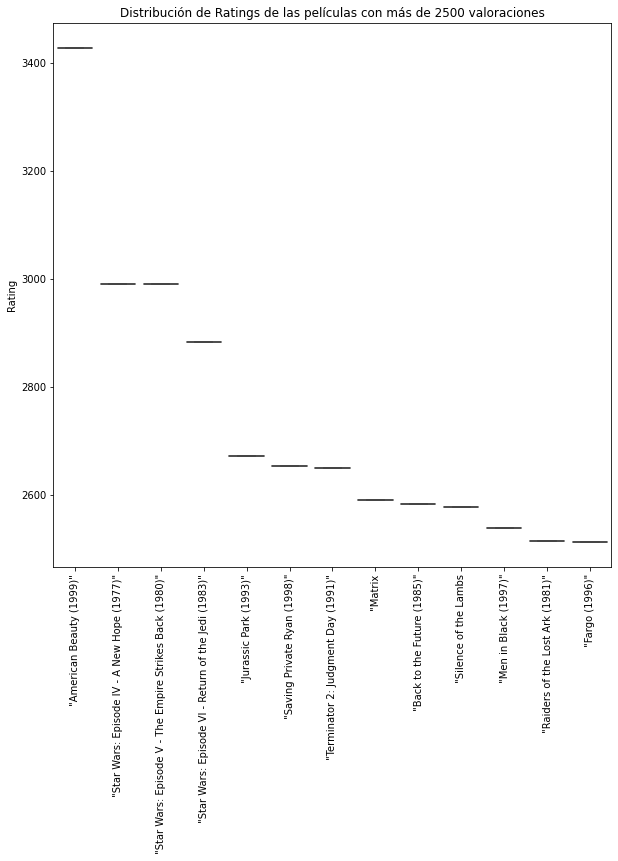

In [339]:
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(ratings_filtrados_con_nombre['title'], ratings_filtrados_con_nombre['rating'], ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

visualizar_boxplots(ratings_filtrados_con_nombre)